In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# For implement Kmeans
import random
from copy import deepcopy
# For cost function
from scipy.spatial import distance

plt.style.use("ggplot")

In [2]:
data = pd.read_csv("./datasets/data_noah.csv")
x = data["x"].values
y = data["y"].values
Noah = np.array(list(zip(x, y)))

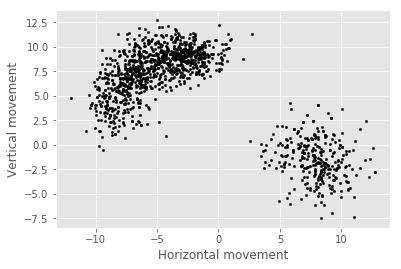

In [3]:
# Plotting values
plt.xlabel("Horizontal movement")
plt.ylabel("Vertical movement")
plt.scatter(x, y,  c="black", s=5)

In [4]:
# Calculate Euclidean distance
def EuclideanDist(a, b, ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [5]:
# Number  of clusters
k = 3

In [6]:
# Implement kmeans
def kmeans(k, dataset):
    # Pick k points as initial centroid
    # May cause error if use below method(duplicate centroid)
    #center = dataset[np.random.randint(dataset.shape[0], size=k), :]
    center = dataset[:k]
    # Store old centroid when it updates
    center_old = np.zeros(center.shape)
    # Cluster labels: 3 clusters (0, 1, 2)
    clusters = np.zeros(len(dataset))
    # Error function
    err = EuclideanDist(center, center_old, None)
    # Loop will run till the err becomes 0
    while err != 0:
        # Assign values to its closest centroid
        for i in range(len(dataset)):
            distances = EuclideanDist(dataset[i], center)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Store the old centroid value
        center_old = deepcopy(center)
        for i in range(k):
            points = [dataset[j] for j in range(len(dataset)) if clusters[j] == i]
            center[i] = np.mean(points, axis=0)
        err = EuclideanDist(center, center_old, None)
    return clusters, center

Text(0.5,1,'Kmeans result')

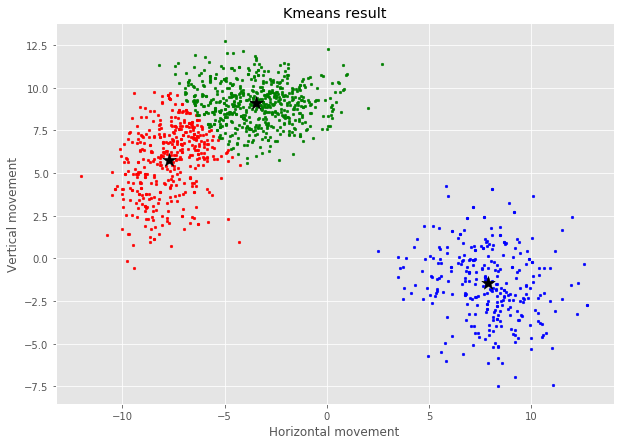

In [7]:
colors = ['r', 'g', 'b']
clusters, center  = kmeans(3, Noah)
fig, ax = plt.subplots(figsize=(10, 7))
points = None
for i in range(k):
        points = np.array([Noah[j] for j in range(len(Noah)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label=colors[i])
ax.scatter(center[:, 0], center[:, 1], marker="*", s=200, c="black")
plt.xlabel("Horizontal movement")
plt.ylabel("Vertical movement")
plt.title("Kmeans result")

In [8]:
# Save result
fig.savefig("Kmeans_result.png")

In [9]:
# Show why there is 3 clusters
def wcss(k, points, centers):
    wcss = 0
    for i in range(k):
        for point in points[i]:
            wcss += (abs(EuclideanDist(point,centers[i], None))) ** 2
    return wcss

In [10]:
wcss_res = []
for k in range(1, 11):
    points = []
    clusters, center = kmeans(k, Noah)
    for i in range(k):
        point = np.array([Noah[j] for j in range(len(Noah)) if clusters[j] == i])
        points.append(point)
    wcss_res.append(wcss(k, points, center))

Text(0,0.5,'wcss')

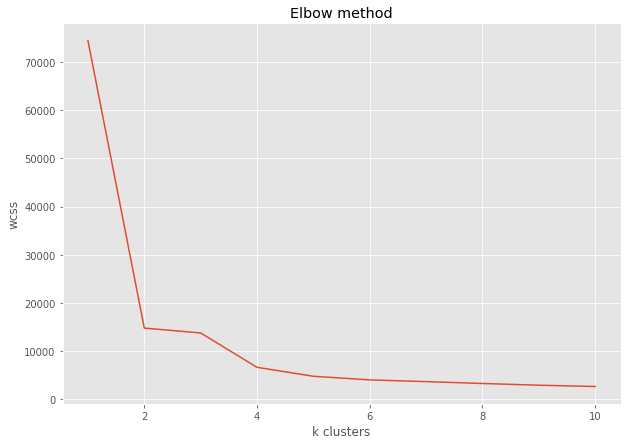

In [11]:
k = range(1, 11)
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(k, wcss_res)
plt.title("Elbow method")
plt.xlabel("k clusters")
plt.ylabel("wcss")

In [12]:
# save result of elbow method
fig.savefig("elbow_method.png")

In [13]:
# Calculate accuracy

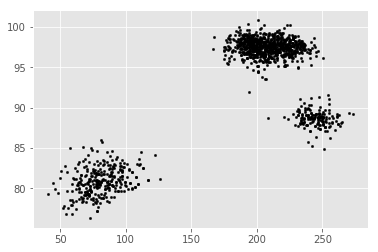

In [14]:
# Use another two or more attributes to partition
x = data["spin"].values
y = data["speed"].values
NewData = np.array(list(zip(x, y)))
plt.scatter(x, y, c="black", s=5)

Text(0.5,1,'Kmeans result 2')

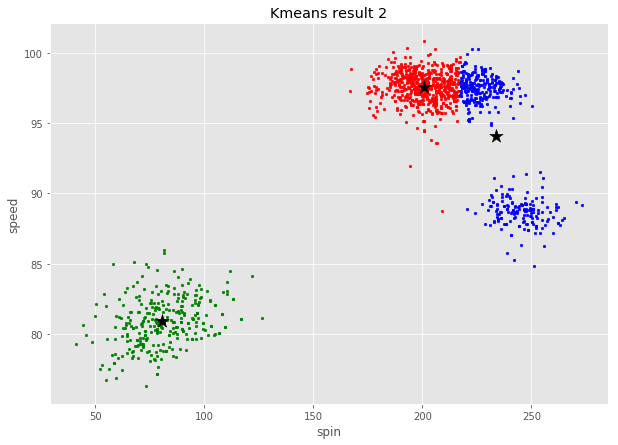

In [15]:
clusters, center = kmeans(3, NewData)
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(figsize=(10, 7))
points = []
for i in range(3):
        point = np.array([NewData[j] for j in range(len(NewData)) if clusters[j] == i])
        points.append(point)
        ax.scatter(point[:, 0], point[:, 1], s=7, c=colors[i], label=colors[i])
ax.scatter(center[:, 0], center[:, 1], marker="*", s=200, c="black")
plt.xlabel("spin")
plt.ylabel("speed")
plt.title("Kmeans result 2")

In [16]:
# Save result2
fig.savefig("Kmeans_result2.png")

In [17]:
# Do elbow method again with new data
wcss_res = []
for k in range(1, 11):
    points = []
    clusters, center = kmeans(k, NewData)
    for i in range(k):
        point = np.array([NewData[j] for j in range(len(NewData)) if clusters[j] == i])
        points.append(point)
    wcss_res.append(wcss(k, points, center))

Text(0,0.5,'wcss')

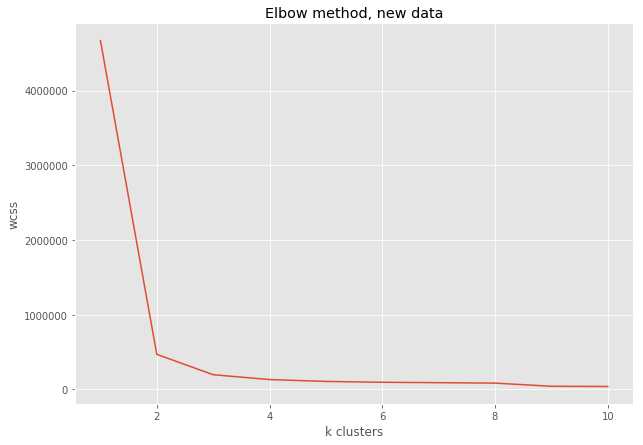

In [18]:
k = range(1, 11)
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(k, wcss_res)
plt.title("Elbow method, new data")
plt.xlabel("k clusters")
plt.ylabel("wcss")

In [19]:
# save result of elbow method of new data
fig.savefig("elbow_method2.png")